In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Things to do:
# 1. comment code and improve readability
# 2. save visualizations as png
# 3. hide warning in Question 1

There are many factors to consider when deciding to take on student loan debt. Obtaining a better understanding of expected income can help borrowers better predict their debt to income ratio and their return on investment. Asking the right questions can help a borrower explore data and obtain meaningful insights about their future financial standing. 
The primary concern with debt is one’s ability to repay the debt. To help explore the debt to income ratio of borrowers, the data for mean and median income can provide meaningful insight. **How does income increase with age, and does having more years of experience lead to higher compensation?**

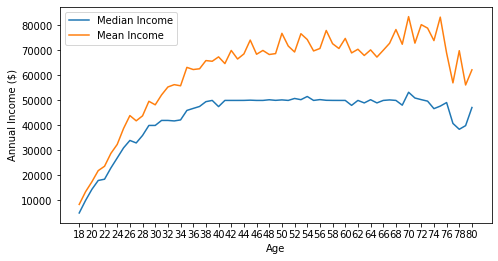

In [3]:
### QUESTION 0: 

income_by_age = pd.read_csv('clean_data/loan_data.csv')
data0 = income_by_age.set_index('age')
_= plt.axes([0,0,1,0.75])
output = plt.plot(data0[['median_income', 'mean_income']])
plt.legend(['Median Income', 'Mean Income'])
plt.ylabel('Annual Income ($)')
plt.xlabel('Age')
plt.xticks(range(18,81, 2))
plt.show()


  For employees between the age of 18 and 40,  there is a direct correlation between compensation and age due to having more years of professional experience. For employees over the age of 40, there is a plateau in the median data that shows there is no significant difference between 20 and 50 years of experience. The mean trend line continues to increase as it accounts for employees in careers that allow for continued growth and increasing compensation. There is a plateau in median income due to much of the workforce being employed in low skill jobs with minimal room for growth.


In addition to better understanding a borrower’s expected income, it will benefit for the borrower to understand where they stand in the student loan debt landscape. **What does the distribution of debt look like, and how will a borrower’s amount of debt compare to other borrowers?**


/home/alhalarewicz/anaconda3/envs/SBEnv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


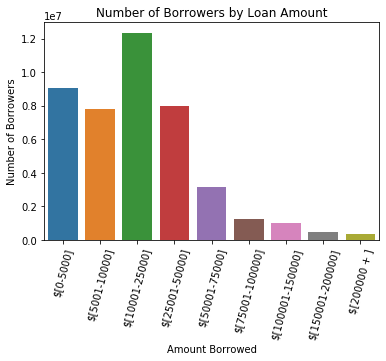

In [4]:
### Question 1

borrowers = pd.read_csv('clean_data/borrowers_2014.csv')
data1 = borrowers.copy()
data1 = data1.fillna(0)

data1['range'] = '$['+data1.minBal.astype(int).astype(str)+'-'+data1.maxBal.astype(int).astype(str)+']'

# correct range for last row
data1.range[8] = '$['+data1.minBal[8].astype(int).astype(str) + ' + ]'

_ = sns.barplot(y='NumberOfBorrowers', x='range', data=data1)

plt.xticks(rotation=75)
plt.title('Number of Borrowers by Loan Amount')
plt.ylabel('Number of Borrowers')
plt.xlabel('Amount Borrowed')
plt.show()


A majority of borrowers hold less than $50,000 of student loan debt. This amount of od debt is tolerable with respect to the mean and median income data.  For most cases, the amount of student loan debt does not exceed the median annual income. For the cases of borrowers with significantly more debt, those borrowers are typically students pursuing higher education for a specialized career. Those with more student loan debt are more likely to work in higher-paying careers with compensation and growth that justifies the investment in education. 


The mean and median data discussed above provides a very general approximation for the amount of income a borrower can expect. Student loan borrowers tend to have a sense of direction within their education and their desired line of work, so it would be more beneficial to look at the median income for specific occupations and how the data differs for males and females. **What is the relationship between median income for males and females within each occupation for a given year?**


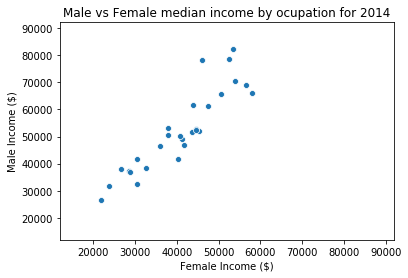

In [5]:
### Question 2:
# What is the Relationship between median income for Males and Females 
# within each ocupation for a given year?
ocup_data = pd.read_csv('clean_data/ocup_data.csv')
data2 = ocup_data.copy()
data2 = data2.set_index(['ocupation', 'gender'])
data2 = data2.unstack(level='gender')

#scatter plot comparing male vs female income within individual ocupation categories
_ = sns.scatterplot(x=('2014', 'Female'), y=('2014', 'Male'), data=data2)

# identify limits of Domain and Range
min_income = min([min(data2[('2014', 'Female')]), min(data2[('2014', 'Male')])])
max_income = max([max(data2[('2014', 'Female')]), max(data2[('2014', 'Male')])])

# add padding
min_income -= 10000
max_income += 10000

# set axis
_ = plt.axis([min_income, max_income, min_income, max_income])

#
plt.title('Male vs Female median income by ocupation for 2014')
plt.xlabel('Female Income ($)')
plt.ylabel('Male Income ($)')

# show scatter plot
plt.show()

The answer is simple and clearly depicts a wage gap between males and females. In the scatter plot, each point represents a single occupational category. The horizontal position of a point describes the median income for females in that single occupational category. The vertical position of the point corresponds to the median income of males in that same occupational category. The trend line for this scatter plot has a slope that is greater than 1. This implies that men are compensated more than their female counterparts in the same line of work. 

Seeing the presence of a wage gap in the data, it would be beneficial to explore trends in the difference in wages. **What are the trends in the wage gap and how did the incomes for males and females compare over a recent 10-year span?**


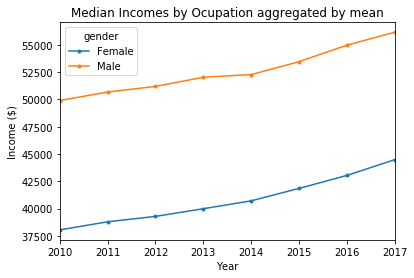

In [6]:
### QUESTION 3:

# Time series plot of median income by year 
cols2keep = list(ocup_data.columns)[:-1]
data3 = ocup_data[cols2keep]

#group median incomes by ocupation and aggregate by mean
data3 = data3.groupby('gender').mean()
data3 = data3.transpose()

# create plot
_ = data3.plot(marker='.')

#set title and axis labels
plt.title('Median Incomes by Ocupation aggregated by mean')
plt.xlabel('Year')
plt.ylabel('Income ($)')

#show plot
plt.show()


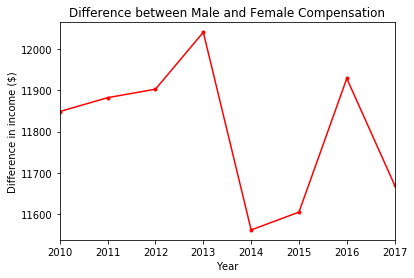

In [7]:
delta = data3.Male - data3.Female
delta.head()
delta.plot(marker='.', color='red')
plt.title('Difference between Male and Female Compensation')
plt.ylabel('Difference in income ($)')
plt.xlabel('Year')
plt.show()

When an average of the median income by occupation is computed separately for males and females, there are two clear trends when consecutive years are plotted as a time-series. The first of the two trends show that the average compensation across the many different occupations is increasing over time. This is good because employees are getting paid more for doing the same types of work. The second trend is in the even amount of separation between the two almost parallel curves. Both the male and female curves increase with time, but the curve describing median income for males remains approximately $12,000 above the median income curve for females. The difference in the curves appears to remain constant without diverging.


Finally, we can examine the cost of living to better inform a borrower about future financial standing. Because this analysis is built on data collected for the US, the borrower should understand how the cost of living differs in the US from other countries. **How does the cost of living index in US cities compare to other cities throughout the world?**

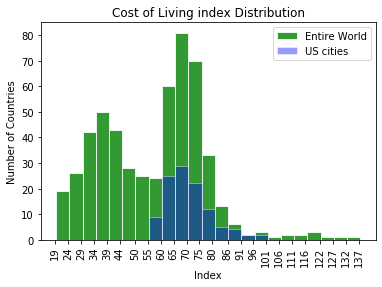

23


In [8]:
#QUESTION 4:
# How does the cost of living in the US compare to other countries?
cost_living = pd.read_csv('clean_data/cost_of_living.csv')
#cost of living index throughout the world highlighting the US.
data4 = cost_living.copy()
data4 = data4[data4.country == ' United States']
bins = int(np.sqrt(cost_living.shape[0]))

_ , bins2, _ = plt.hist(cost_living.cost_of_living, bins=bins, color='green', alpha=0.8, edgecolor='white')
_ = plt.hist(data4.cost_of_living, bins=bins2, color='blue', edgecolor='white', alpha=0.4)
_ = plt.title('Cost of Living index Distribution')
_ = plt.xlabel('Index')
_ = plt.ylabel('Number of Countries')
_ = plt.legend(['Entire World', 'US cities'])
plt.xticks([int(x) for x in bins2] , rotation=90)
plt.show()
print(bins)

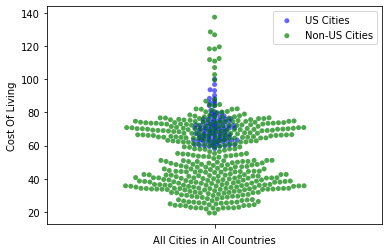

In [9]:
### Question 5:
# Is there a better way to visualize cost of living in the world
# make a beeswarm plot
data5 = cost_living.copy()
us_data = data5[data5.country == ' United States']
not_us = data5[data5.country != ' United States']
#plt.axes([0,0,1,0.5])
_ = sns.swarmplot(x='country', y='cost_of_living', data=us_data, color='blue', alpha=0.6)
_ = sns.swarmplot(y='cost_of_living', data=not_us, color='green', alpha=0.7)
_ = plt.xticks(rotation=90)
plt.legend(['US Cities', 'Non-US Cities'])
plt.xlabel('All Cities in All Countries')
plt.ylabel('Cost Of Living')
plt.show()

The cost of living throughout the world appears to be a bimodal distribution, which separates the world into two groups. The left clustered peak represents countries with a lower cost of living and the right clustered peak represents countries with a higher cost of living. The US cities appear to be entirely in the group with a higher cost of living. A bee-swarm plot provides a better visualization of the distribution. Again, the US is clearly in the swarm of cities with a higher cost of living with a similar distribution to its respective swarm. 


Furthermore, A borrower will want to know how the cost of living in their particular city compares to other cities in the US. **How does the cost of living in a single city compare to other cities in the US?**


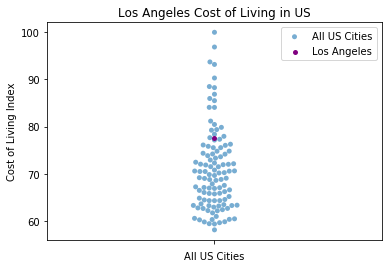

In [10]:
### Question 6:

los_angeles = us_data[us_data.city == 'Los Angeles']
_ = sns.swarmplot(y='cost_of_living', data=us_data, alpha=0.6)
_ = sns.swarmplot(y='cost_of_living', data=los_angeles, color='purple')
_ = plt.title('Los Angeles Cost of Living in US')
_ = plt.xlabel('All US Cities')
_ = plt.ylabel('Cost of Living Index')
_ = plt.legend(['All US Cities', 'Los Angeles'])
plt.show()

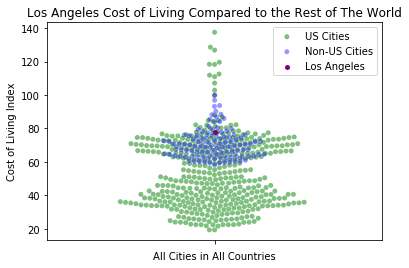

In [11]:
# How does Los Angeles compare to other cities throghout the world?
_ =sns.swarmplot(y='cost_of_living', data=not_us, color='green', alpha=0.5)
_ =sns.swarmplot(y='cost_of_living', data=us_data, color='blue', alpha=0.4)
_ =sns.swarmplot(y='cost_of_living', data=los_angeles, color='purple')
plt.title('Los Angeles Cost of Living Compared to the Rest of The World')
plt.xlabel('All Cities in All Countries')
plt.ylabel('Cost of Living Index')
plt.legend(['US Cities', 'Non-US Cities', 'Los Angeles'])
plt.show()

The answer will focus on Los Angeles, CA as a single example. This beeswarm plot shows the cost of living in Los Angeles as it compares to other cities in the US. It is clear that Los Angeles is among the US cities with a higher cost of living, but is surprisingly not the highest. This graph can be overlayed with the world data to understand how Los Angeles compares to other cities throughout the world. 


A final thought for the borrower would be to compare the average cost of living in different states. **How does the average cost of living vary by state?**


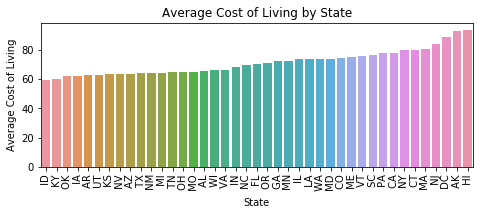

In [12]:
### Question 7:
# How does the Average Cost of Living vary by state?
data7 = us_data.copy()
data7 = data7.groupby('state').mean()
data7.head()

data7['state'] = data7.index
data7 = data7.sort_values('cost_of_living')

plt.axes([0,0,1,0.5])
_ = sns.barplot(x='state', y='cost_of_living', data=data7)
plt.title('Average Cost of Living by State')
plt.xlabel('State')
plt.ylabel('Average Cost of Living')
plt.xticks(rotation=90)

plt.show()

This final graph shows the borrower how the cost of living differs from state to state. The bar plot was constructed by grouping the cities by state and aggregating them by their mean.


With a better sense for expected income by occupation and the associated cost of living for each city, borrowers will be more informed when taking on student loans. Though the return on investment is biased for men due to the wage gap, it is possible to repay debt and not be crippled by an extreme debt to income ratio. By structuring your education around a high skill occupation, a student loan borrower will be able to repay their debt as they progress through their professional career.


Moving forward, this project will discuss topics that go into more depth about efficient debt repayment. The project will further explore data to determine if living in a high cost of living area is beneficial or detrimental towards paying student Loans. Minimum wage and Salaries take into consideration the cost of living for a particular city or state. In Further exploration, we will determine whether it is easier to manage student debt with a lower salary in a region with a lower cost of living when compared to having a higher salary in a region with a higher cost of living. 
